In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [3]:
 rand= np.array([[0.9796, np.nan,  np.nan, np.nan, np.nan],
...        [0.9647, 0.9515,    np.nan, np.nan, np.nan],
...        [0.9598, 0.9373, 0.9551,     np.nan, np.nan],
...        [0.9442, 0.9229, 0.9461, 0.9542,    np.nan],
...        [0.94  , 0.9138, 0.9458, 0.9391, 0.9552]])


In [5]:
kmeans = np.array([[0.9753,  np.nan,  np.nan, np.nan, np.nan],
...        [0.9568, 0.9546,  np.nan,  np.nan, np.nan],
...        [0.9459, 0.9268, 0.9504,    np.nan, np.nan],
...        [0.9283, 0.9169, 0.9389, 0.9463,    np.nan],
...        [0.9049, 0.8945, 0.9286, 0.9264, 0.951 ]])




In [12]:
def plot3(filename,  rand_vcl, kcen_vcl):

    fig = plt.figure(figsize=(20,10))
    ax = plt.gca()
    plt.plot(np.arange(len(rand_vcl))+1, rand_vcl, label='VCL + Random Coreset', marker='o')
    plt.plot(np.arange(len(kcen_vcl))+1, kcen_vcl, label='VCL + K-center Coreset', marker='o')
    ax.set_xticks(range(1, len(rand_vcl)+1))
    ax.set_ylabel('Average accuracy')
    ax.set_xlabel('\# tasks')
    ax.legend()
    plt.show()
    #fig.savefig(filename)
    #plt.close()


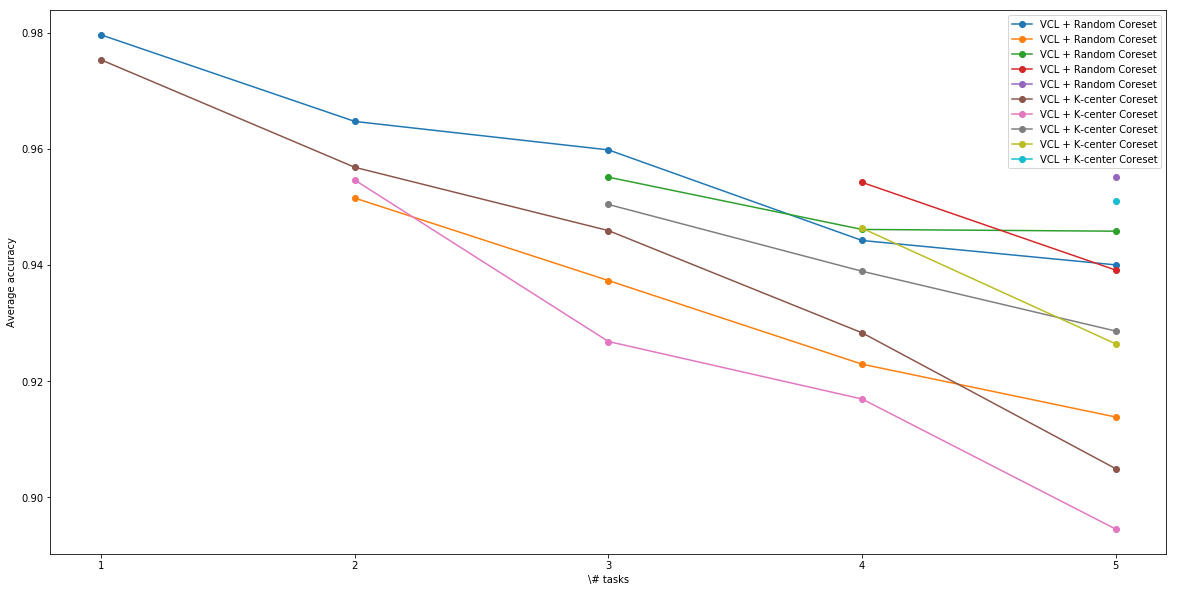

In [13]:
plot3("results.jpg", rand, kmeans)

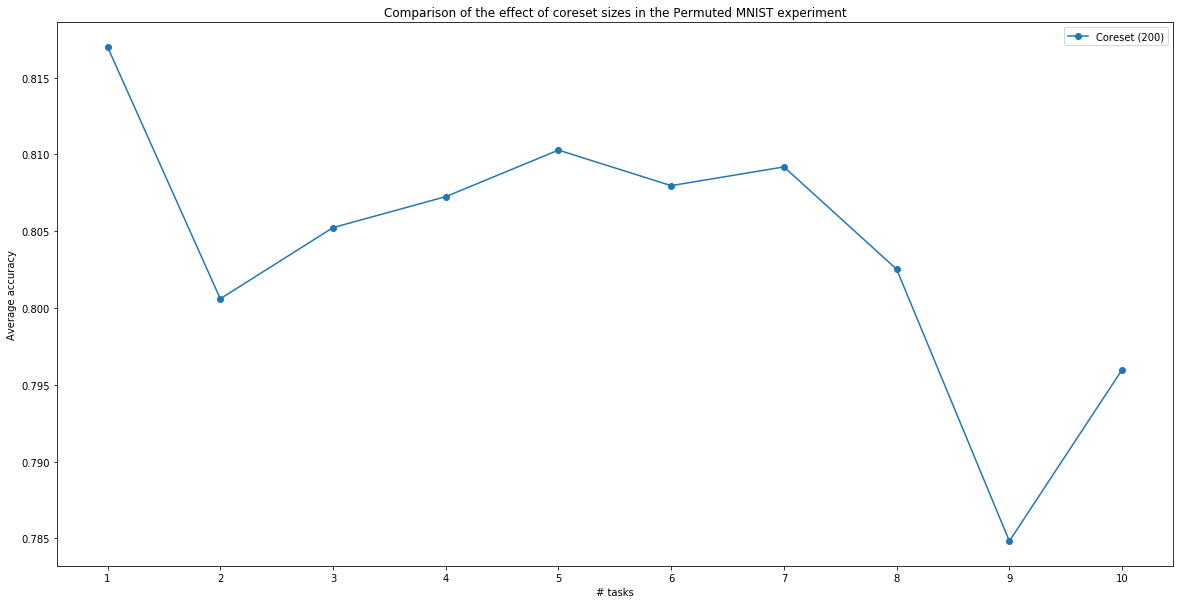

In [2]:
directory = "discriminative/results/"
import glob
directory_files = sorted(glob.glob(directory + "only-coreset-*.npy"))
fig = plt.figure(figsize=(20,10))
ax = plt.gca()

coreset_sizes = []
for file in directory_files:
    coreset_size = file.split("/")[-1].split("-")[-1].split(".")[0]
    coreset_sizes.append(coreset_size)

coreset_sizes = sorted(list(map(int,coreset_sizes)))

for coreset_size in coreset_sizes:
    
    file_name = "only-coreset-{}.npy".format(coreset_size)
    label = 'Coreset ({})'.format(coreset_size)
    acc_file = np.load(directory + file_name)
    acc_mean_file = np.nanmean(acc_file, 1)
    coreset_size = file.split("/")[-1].split("-")[-1].split(".")[0]   
    plt.plot(np.arange(len(acc_mean_file))+1, acc_mean_file, label=label, marker='o')
    
ax.set_xticks(range(1, len(acc_mean_file)+1))
ax.set_ylabel('Average accuracy')
ax.set_xlabel('# tasks')
ax.legend()
plt.title("Comparison of the effect of coreset sizes in the Permuted MNIST experiment")
plt.show()


[[0.817     nan    nan    nan    nan    nan    nan    nan    nan    nan]
 [0.8121 0.7891    nan    nan    nan    nan    nan    nan    nan    nan]
 [0.8099 0.7869 0.8189    nan    nan    nan    nan    nan    nan    nan]
 [0.8041 0.7951 0.8201 0.8097    nan    nan    nan    nan    nan    nan]
 [0.7962 0.7921 0.819  0.8144 0.8297    nan    nan    nan    nan    nan]
 [0.7965 0.7863 0.8117 0.8078 0.8259 0.8196    nan    nan    nan    nan]
 [0.8045 0.8009 0.8128 0.8066 0.8214 0.8194 0.7987    nan    nan    nan]
 [0.7916 0.793  0.8065 0.7942 0.8124 0.8148 0.8051 0.8026    nan    nan]
 [0.7721 0.7898 0.7973 0.7835 0.8014 0.802  0.7776 0.7839 0.7558    nan]
 [0.784  0.7927 0.8016 0.7908 0.8157 0.8156 0.808  0.7969 0.7663 0.7882]]


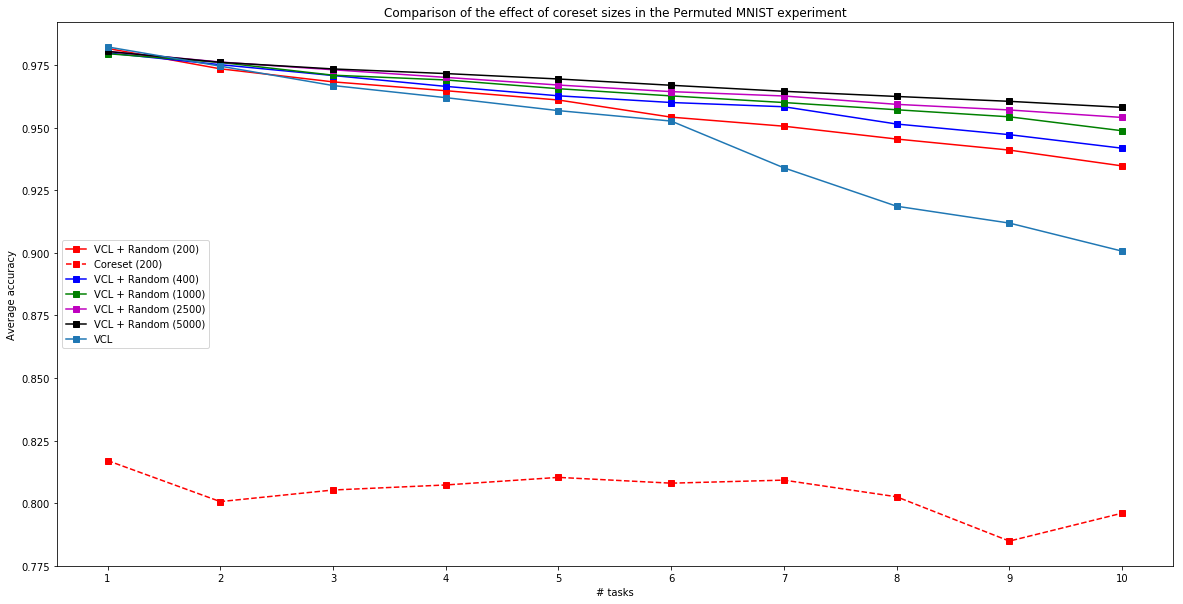

In [5]:
directory = "discriminative/results/"
import glob
directory_files = sorted(glob.glob(directory + "rand-VCL*.npy"))
fig = plt.figure(figsize=(20,10))
ax = plt.gca()

coreset_sizes = []
for file in directory_files:
    coreset_size = file.split("/")[-1].split("-")[-1].split(".")[0]
    coreset_sizes.append(coreset_size)

coreset_sizes = sorted(list(map(int,coreset_sizes)))
color_coresets = ["r","b","g", "m", "black"]
for i, coreset_size in enumerate(coreset_sizes):
    
    file_name = "rand-VCL-{}.npy".format(coreset_size)
    label = 'VCL + Random ({})'.format(coreset_size)
    acc_file = np.load(directory + file_name)
    acc_mean_file = np.nanmean(acc_file, 1)
    plt.plot(np.arange(len(acc_mean_file))+1, acc_mean_file, label=label, color ="{}".format(color_coresets[i]) ,marker='s')
    if coreset_size == 200:
        file_coreset_name = "only-coreset-{}.npy".format(coreset_size)
        label_coreset = 'Coreset ({})'.format(coreset_size)
        acc_coreset_file = np.load(directory + file_coreset_name)
        print(acc_coreset_file)
        acc_mean_coreset_file = np.nanmean(acc_coreset_file, 1)
        plt.plot(np.arange(len(acc_mean_coreset_file))+1, acc_mean_coreset_file, label=label_coreset, linestyle = "--", color= "{}".format(color_coresets[i]), marker='s')

    
file_name = "VCL.npy"
acc_file = np.load(directory + file_name)
acc_mean = np.nanmean(acc_file, 1)
plt.plot(np.arange(len(acc_mean))+1, acc_mean, label="VCL", marker='s')
    
ax.set_xticks(range(1, len(acc_mean_file)+1))
ax.set_ylabel('Average accuracy')
ax.set_xlabel('# tasks')
ax.legend()
plt.title("Comparison of the effect of coreset sizes in the Permuted MNIST experiment")
plt.show()


In [2]:
directory = "discriminative/results/"
import glob
directory_files = sorted(glob.glob(directory + "*-split.npy"))
VCL_split = np.load(directory+"VCL-split.npy")
randVCL_split = np.load(directory+"randVCL-split.npy")
kcenVCL_split = np.load(directory+"kcenVCL-split.npy")
print(VCL_split)
print(randVCL_split)
print(kcenVCL_split)

[[0.99952719        nan        nan        nan        nan]
 [0.99952719 0.97796278        nan        nan        nan]
 [0.99952719 0.97355534 0.99252935        nan        nan]
 [0.99763593 0.96131244 0.99252935 0.99546828        nan]
 [0.97210402 0.90450539 0.98719317 0.97834844 0.97982854]]
[[0.99952719        nan        nan        nan        nan]
 [0.99952719 0.97502449        nan        nan        nan]
 [0.99952719 0.97453477 0.99626467        nan        nan]
 [0.99810875 0.97453477 0.9941302  0.99546828        nan]
 [0.99810875 0.97502449 0.9909285  0.99446123 0.97932426]]
[[0.99952719        nan        nan        nan        nan]
 [0.99952719 0.97796278        nan        nan        nan]
 [0.99952719 0.97747307 0.98932764        nan        nan]
 [0.99952719 0.97061704 0.98452508 0.99345418        nan]
 [0.99905437 0.96474045 0.98826041 0.98992951 0.97932426]]


<Figure size 432x288 with 0 Axes>

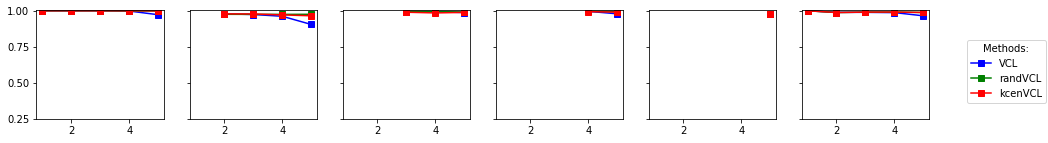

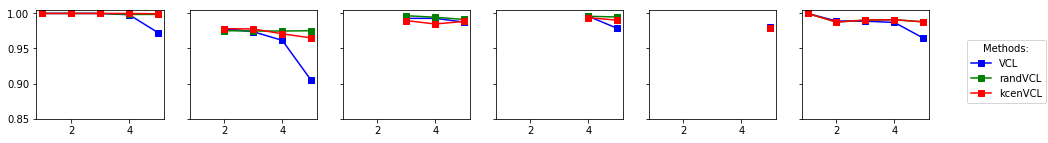

In [18]:
x = np.arange(1,6)

plt.clf()
g, ax1 = plt.subplots(1, 6, figsize=(16,2), sharex=True,
                                                        sharey=True)
h, ax2 = plt.subplots(1, 6, figsize=(16,2), sharex=True,
                                                        sharey=True)
for i in range(5):
    ax1[i].plot(x[i:], VCL_split[i:,i], color = "b", marker = "s")
    ax1[i].plot(x[i:], randVCL_split[i:,i],color = "g", marker = "s")
    ax1[i].plot(x[i:], kcenVCL_split[i:,i], color = "r", marker = "s")
    ax2[i].plot(x[i:], VCL_split[i:,i],color = "b", marker = "s")
    ax2[i].plot(x[i:], randVCL_split[i:,i],color = "g", marker = "s")
    ax2[i].plot(x[i:], kcenVCL_split[i:,i], color = "r",marker = "s")
ax1[-1].plot(x, np.nanmean(VCL_split,1), color = "b", marker = "s")
ax1[-1].plot(x, np.nanmean(randVCL_split,1), color = "g", marker = "s")
ax1[-1].plot(x, np.nanmean(randVCL_split,1), color = "r", marker = "s")
ax2[-1].plot(x, np.nanmean(VCL_split,1), color = "b", marker = "s")
ax2[-1].plot(x, np.nanmean(randVCL_split,1), color = "g", marker = "s")
ax2[-1].plot(x, np.nanmean(randVCL_split,1), color = "r", marker = "s")
#plt.figlegend(["VCL", "randVCL", "kcenVCL"],loc = "upper center")




for i in range(6):
    ax1[i].set_yticks(np.arange(0.25, 1.25, 0.25))
    ax2[i].set_yticks(np.arange(0.85, 1.00, 0.05))
g.legend(   # The line objects
           labels=["VCL", "randVCL", "kcenVCL"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Methods:"  # Title for the legend
           )
h.legend(   # The line objects
           labels=["VCL", "randVCL", "kcenVCL"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.3,    # Small spacing around legend box
           title="Methods:"  # Title for the legend
           )
#for axi in ax1.flat:
#    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
#    axi.yaxis.set_major_locator(plt.MaxNLocator(3))

